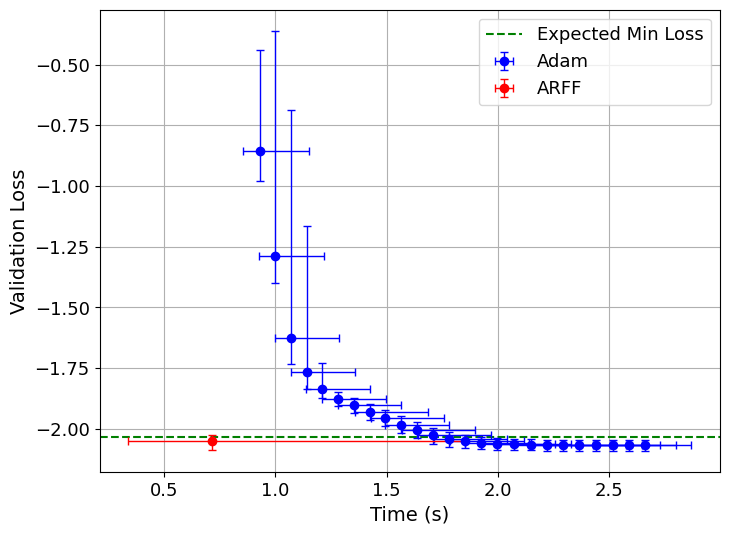

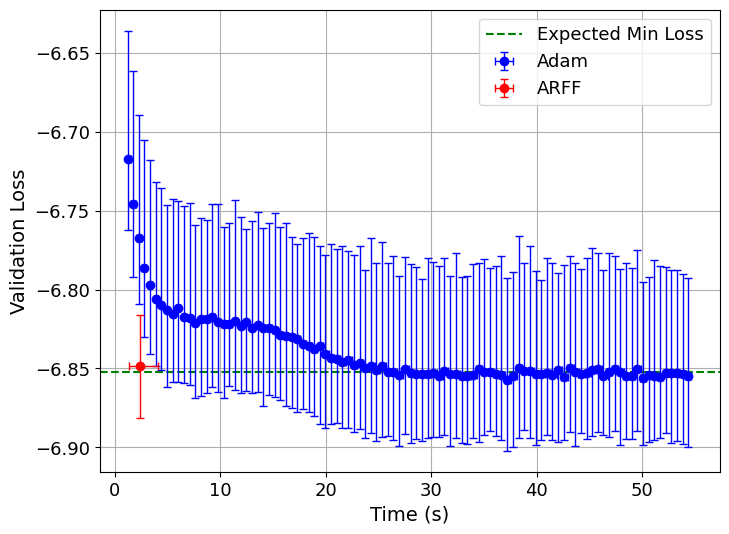

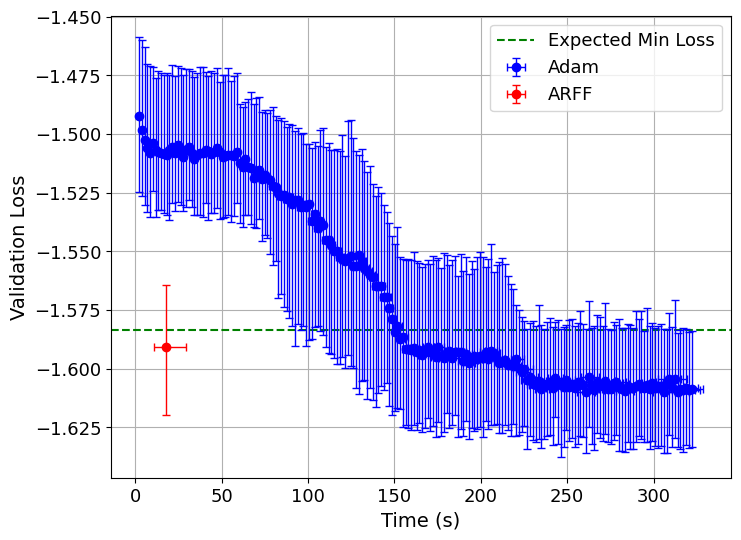

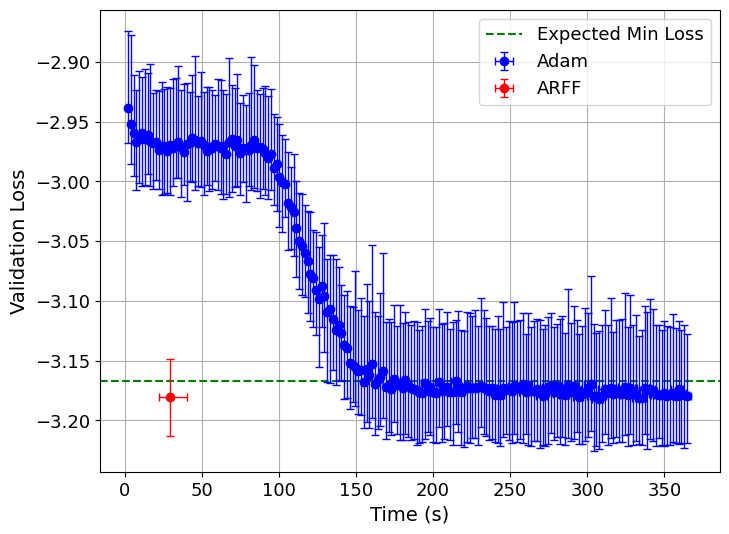

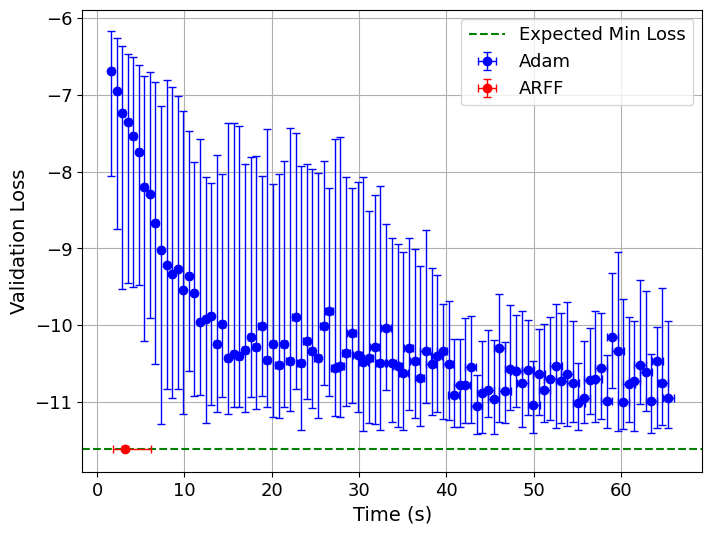

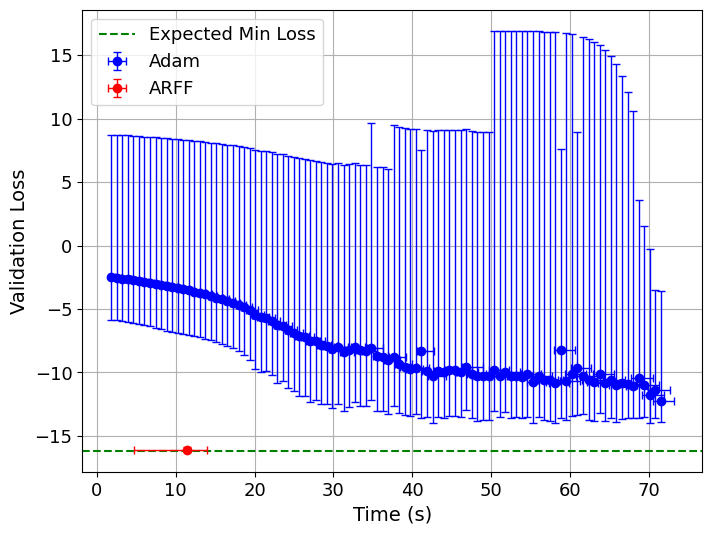

/home/douglaoj/miniconda3/envs/SDE_NN/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1066: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/home/douglaoj/miniconda3/envs/SDE_NN/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1067: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/home/douglaoj/miniconda3/envs/SDE_NN/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/douglaoj/miniconda3/envs/SDE_NN/lib/python3.9/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


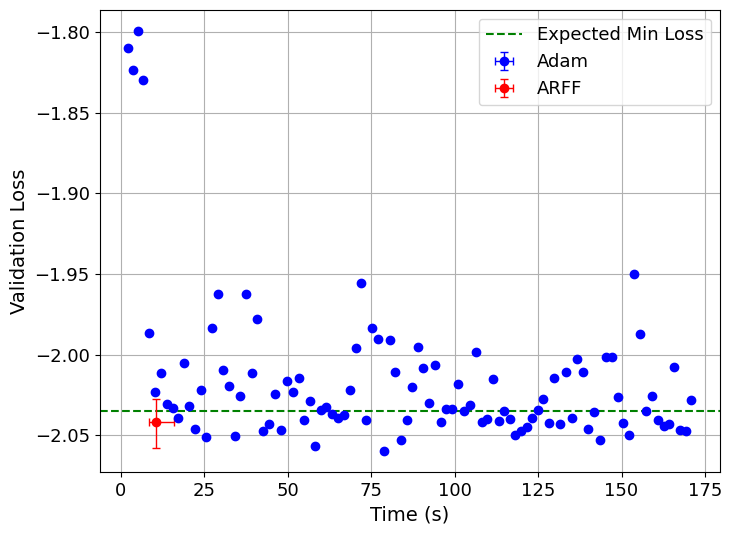

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

script_dir = os.getcwd()
data_dir = script_dir

#test_names = ['1 - 1d sde', '2 - 2d sde', '3 - 1d sde-cubic', '3 - 2d sde-cubic', '4 - 3d sde-LT', '4 - 3d sde-spd', '6 - SIRGillespie', '8 - nonGaussian']
test_names = ['1-1d_sde', '2-2d_sde', '3-1d_sde-cubic', '3-2d_sde-cubic', '4-3d_sde-LT', '4-3d_sde-spd', '5-Langevin']
n_subsample = 1000

for i in range(len(test_names)):
    test_name = test_names[i]

    # Load Adam
    Adam_path = os.path.join(data_dir, f'example{test_name}_SS{n_subsample}_epochs.csv')
    data = pd.read_csv(Adam_path)
    
    Adam_time = data.iloc[:, 0]
    Adam_loss = data.iloc[:, 1]
    Adam_time_above_std = data.iloc[:, 2]
    Adam_time_below_std = data.iloc[:, 3]
    Adam_loss_above_std = data.iloc[:, 4]
    Adam_loss_below_std = data.iloc[:, 5]
    
    # Load ARFF
    ARFF_path = os.path.join(data_dir, f'ex{test_name}_SS{n_subsample}.txt')
    with open(ARFF_path, 'r') as file:
        line = file.readline().strip()
        ARFF_time, ARFF_loss, ARFF_time_above_std, ARFF_time_below_std, ARFF_loss_above_std, ARFF_loss_below_std = map(float, line.split(','))

    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # min loss
    min_loss_path = os.path.join(data_dir, f'ex{test_name}_SS{n_subsample}_min_loss.txt')
    with open(min_loss_path, 'r') as file:
        line = file.readline().strip()
        min_loss = float(line)
    plt.axhline(y=min_loss, color='green', linestyle='--', linewidth=1.5, label='Expected Min Loss')
    
    plt.errorbar(
        Adam_time, Adam_loss,
        xerr=[Adam_time_below_std, Adam_time_above_std], 
        yerr=[Adam_loss_below_std, Adam_loss_above_std],  
        fmt='o', color='blue', ecolor='blue', elinewidth=1.0, capsize=3, label='Adam'
    )
    
    plt.errorbar(
        ARFF_time, ARFF_loss,
        xerr=[[ARFF_time_below_std], [ARFF_time_above_std]], 
        yerr=[[ARFF_loss_below_std], [ARFF_loss_above_std]],  
        fmt='o', color='red', ecolor='red', elinewidth=1.0, capsize=3, label='ARFF'
    )
    
    # Add labels and title
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Validation Loss', fontsize=14)
    #plt.title(f'Example {test_name}')
    plt.legend()
    
    # Show the plot
    plt.rcParams.update({'font.size': 13})
    plt.grid(True)
    plt.show()

    # output_file = os.path.join(script_dir, f'Example {test_name}')
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    # plt.close()
    

